# References:
- developers, 2019. scikit-learn user guide. [Online] Available at: https://scikit-learn.org/stable/_downloads/scikit-learn-docs.pdf [Accessed 11 3 2019].

- Waterbury, S., 2018. sklearn.model_selection.StratifiedKFold. [Online] Available at: https://github.com/scikit-learn/scikit learn/blob/7b136e9/sklearn/model_selection/_split.py#L566 [Accessed 28 1 2019].

- Müller, F., 2018. pandas.get_dummies. [Online] Available at: https://github.com/pandasdev/pandas/blob/v0.24.2/pandas/core/reshape/reshape.py#L701-L867 [Accessed 12 2 2019].

- Orbegoso, D., 2017. Empirical study of dimensionality reduction methodologies for classification problems. [Online] 
Available at: https://www.researchgate.net/post/How_to_apply_properly_k-cross_validation_with_oversampling_and_dimensionality_reduction
[Accessed 15 2 2019].

- Langerman, J., 2018. sklearn.metrics.classification_report. [Online] Available at: https://github.com/scikit-learn/scikit-learn/blob/7b136e9/sklearn/metrics/classification.py#L1448 [Accessed 15 3 2019].


In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold , RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,roc_curve,auc, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore")
warnings.filterwarnings(action="ignore",category=DeprecationWarning)
warnings.filterwarnings(action="ignore",category=FutureWarning)
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
 

In [3]:
mat = pd.read_csv("C:/Users/test/Desktop/data/student-mat.csv",delimiter=';')

In [4]:
#(Müller, 2018)
cat_vars= mat.select_dtypes(include=['object']).columns.to_list()
dummies_data = pd.DataFrame(mat,copy=True)
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(dummies_data[var], prefix=var, drop_first=True)
    data1=dummies_data.join(cat_list)
    dummies_data=data1
    
data_vars=dummies_data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

dummies_data_final=dummies_data[to_keep]

In [5]:
dummies_data_final['G2'].value_counts()

9     50
10    46
12    41
13    37
11    35
15    34
8     32
14    23
7     21
5     15
6     14
0     13
16    13
18    12
17     5
19     3
4      1
Name: G2, dtype: int64

In [6]:
V=dummies_data_final['G1'].median()
S=dummies_data_final['G2'].median()
R=dummies_data_final['G3'].median()
dummies_data_final['G2']=dummies_data_final['G2'].replace(0, S)
dummies_data_final['G3']=dummies_data_final['G3'].replace(0, R)
dummies_data_final['G1']=dummies_data_final['G1'].replace(0, V)

In [7]:
def map_G3(x):
    if x<10:
        return 0
    else: return 1

dummies_data_final["G3"] = dummies_data_final.G3.apply(map_G3)

In [8]:
dummies_data_final.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,1,0,1,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,1,0,1,1,0,0
5,16,4,3,1,2,0,5,4,2,1,...,1,0,0,1,1,1,1,1,1,0
6,16,2,2,1,2,0,4,4,4,1,...,1,0,0,0,0,0,1,1,1,0
7,17,4,4,2,2,0,4,1,4,1,...,1,0,1,1,0,0,1,1,0,0
8,15,3,2,1,2,0,4,2,2,1,...,1,0,0,1,1,0,1,1,1,0
9,15,3,4,1,2,0,5,5,1,1,...,1,0,0,1,1,1,1,1,1,0


In [9]:
X = dummies_data_final.loc[:, dummies_data_final.columns != 'G3']
Y = dummies_data_final['G3']

In [10]:
dummies_data_final['G3'].value_counts()

1    303
0     92
Name: G3, dtype: int64

from math import sqrt
y_predict = mdf.fittedvalues
RMSE = sqrt(((y-y_predict)**2).values.mean())

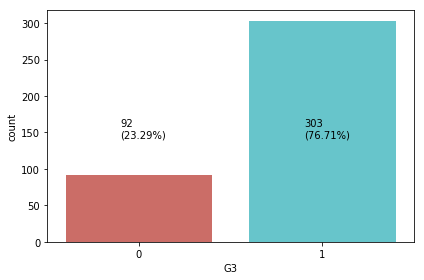

In [11]:
import seaborn as sns
sns.countplot(x='G3',data=dummies_data_final, palette='hls')
plt.annotate('{}\n({:.4}%)'.format(dummies_data_final['G3'].value_counts()[0], dummies_data_final['G3'].value_counts()[0]/dummies_data_final['G3'].count()*100),
(0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(dummies_data_final['G3'].value_counts()[1], 
                                         dummies_data_final['G3'].value_counts()[1]/dummies_data_final['G3'].count()*100),
             (0.70, 0.45), xycoords='axes fraction')
plt.tight_layout()
plt.show()


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [14]:
kf = KFold(n_splits=10, random_state=42)
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []
#(Orbegoso, 2017)

In [23]:
## DT
##(Waterbury, 2018)
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = RandomizedSearchCV(DecisionTreeClassifier(), tree_params, cv= 10)
# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
for train, test in kf.split(X_train, y_train):
    # SMOTE happens during Cross Validation not before..
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), grid_tree) 
    model = pipeline.fit(X_train[train], y_train[train])
    best_est_dt = grid_tree.best_estimator_
    prediction = best_est_dt.predict(X_train[test])
    
    accuracy_lst.append(pipeline.score(X_train[test], y_train[test]))
    precision_lst.append(precision_score(y_train[test], prediction))
    recall_lst.append(recall_score(y_train[test], prediction))
    f1_lst.append(f1_score(y_train[test], prediction))
    auc_lst.append(roc_auc_score(y_train[test], prediction))
    
print()
print("done right mean of scores 10-fold:")
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('AUC: {}'.format(np.mean(auc_lst)))

from sklearn.metrics import confusion_matrix

#(Langerman, 2018)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, best_est_dt.predict(X_test)))

## 
print ('\nTest Results')
print ('Accuracy:' ,best_est_dt.score(X_test, y_test))
print ('precision:' , precision_score(y_test, best_est_dt.predict(X_test)))
print ('Recall:' , recall_score(y_test, best_est_dt.predict(X_test)))
print ('F1:' ,f1_score(y_test, best_est_dt.predict(X_test)))
print('AUC:',roc_auc_score(y_test, best_est_dt.predict(X_test)))
print('***')
print('***')
print('Test for Overfitting')
from sklearn.metrics import classification_report
print(classification_report(y_train[test], prediction))
print("*")
from sklearn.metrics import classification_report
print(classification_report(y_test, best_est_dt.predict(X_test)))



done right mean of scores 10-fold:
accuracy: 0.8547253024193548
precision: 0.9301950257215438
recall: 0.8826390435249131
f1: 0.9037528157953876
AUC: 0.8167857916037263

Confusion Matrix:
 [[21  1]
 [10 47]]

Test Results
Accuracy: 0.8607594936708861
precision: 0.9791666666666666
Recall: 0.8245614035087719
F1: 0.8952380952380952
AUC: 0.8895534290271132
***
***
Test for Overfitting
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.95      0.98        22

   micro avg       0.97      0.97      0.97        31
   macro avg       0.95      0.98      0.96        31
weighted avg       0.97      0.97      0.97        31

*
              precision    recall  f1-score   support

           0       0.68      0.95      0.79        22
           1       0.98      0.82      0.90        57

   micro avg       0.86      0.86      0.86        79
   macro avg       0.83      0.89      0.84        79
weighted avg   

In [16]:
## GNB

grid_nb = GaussianNB()
# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
for train, test in kf.split(X_train, y_train):
    # SMOTE happens during Cross Validation not before..
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), grid_nb) 
    model_nb = pipeline.fit(X_train[train], y_train[train])
    #best_est_nb = grid_nb.best_estimator_
    prediction = grid_nb.predict(X_train[test])
    
    accuracy_lst.append(pipeline.score(X_train[test], y_train[test]))
    precision_lst.append(precision_score(y_train[test], prediction))
    recall_lst.append(recall_score(y_train[test], prediction))
    f1_lst.append(f1_score(y_train[test], prediction))
    auc_lst.append(roc_auc_score(y_train[test], prediction))
    
print()
print("done right mean of scores 10-fold:")
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('AUC: {}'.format(np.mean(auc_lst)))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, grid_nb.predict(X_test)))
## 
print ('\nTest Results')
print ('Accuracy:' ,grid_nb.score(X_test, y_test))
print ('precision:' , precision_score(y_test, grid_nb.predict(X_test)))
print ('Recall:' , recall_score(y_test, grid_nb.predict(X_test)))
print ('F1:' ,f1_score(y_test, grid_nb.predict(X_test)))
print('AUC:',roc_auc_score(y_test, grid_nb.predict(X_test)))
print('***')
print('***')
print('Test for Overfitting')
from sklearn.metrics import classification_report
print(classification_report(y_train[test], prediction))
print("*")
from sklearn.metrics import classification_report
print(classification_report(y_test, grid_nb.predict(X_test)))


done right mean of scores 10-fold:
accuracy: 0.811945564516129
precision: 0.9113690190646713
recall: 0.846334074138422
f1: 0.8751044294475179
AUC: 0.7682860846882587

Confusion Matrix:
 [[11 11]
 [ 7 50]]

Test Results
Accuracy: 0.7721518987341772
precision: 0.819672131147541
Recall: 0.8771929824561403
F1: 0.8474576271186439
AUC: 0.6885964912280702
***
***
Test for Overfitting
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.86      0.86      0.86        22

   micro avg       0.81      0.81      0.81        31
   macro avg       0.77      0.77      0.77        31
weighted avg       0.81      0.81      0.81        31

*
              precision    recall  f1-score   support

           0       0.61      0.50      0.55        22
           1       0.82      0.88      0.85        57

   micro avg       0.77      0.77      0.77        79
   macro avg       0.72      0.69      0.70        79
weighted avg      

In [28]:
##RF
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [50],
    'max_features': ['auto'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['entropy']}
CV_rfc = RandomizedSearchCV(rfc, param_grid, cv= 10)

# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
i=0
for train, test in kf.split(X_train, y_train):
    # SMOTE happens during Cross Validation not before..
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), CV_rfc) 
    i=i+1
    model = pipeline.fit(X_train[train], y_train[train])
    best_est_rf = CV_rfc.best_estimator_
    prediction = best_est_rf.predict(X_train[test])
    
    accuracy_lst.append(pipeline.score(X_train[test], y_train[test]))
    precision_lst.append(precision_score(y_train[test], prediction))
    recall_lst.append(recall_score(y_train[test], prediction))
    f1_lst.append(f1_score(y_train[test], prediction))
    auc_lst.append(roc_auc_score(y_train[test], prediction))
    
print()
print("done right mean of scores 10-fold:")
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('AUC: {}'.format(np.mean(auc_lst)))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, best_est_rf.predict(X_test)))
## 
print ('\nTest Results')
print ('Accuracy:' ,best_est_rf.score(X_test, y_test))
print ('precision:' , precision_score(y_test, best_est_rf.predict(X_test)))
print ('Recall:' , recall_score(y_test, best_est_rf.predict(X_test)))
print ('F1:' ,f1_score(y_test, best_est_rf.predict(X_test)))
print('AUC:',roc_auc_score(y_test, best_est_rf.predict(X_test)))
print('***')
print('***')
print('Test for Overfitting')
from sklearn.metrics import classification_report
print(classification_report(y_train[test], prediction))
print("*")
from sklearn.metrics import classification_report
print(classification_report(y_test, best_est_rf.predict(X_test)))


done right mean of scores 10-fold:
accuracy: 0.8581808312655087
precision: 0.9335256644745988
recall: 0.8831344646929932
f1: 0.9058603936103174
AUC: 0.8234414692207335

Confusion Matrix:
 [[19  3]
 [ 9 48]]

Test Results
Accuracy: 0.8481012658227848
precision: 0.9411764705882353
Recall: 0.8421052631578947
F1: 0.8888888888888888
AUC: 0.8528708133971291
***
***
Test for Overfitting
              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.95      0.86      0.90        22

   micro avg       0.87      0.87      0.87        31
   macro avg       0.84      0.88      0.85        31
weighted avg       0.89      0.87      0.87        31

*
              precision    recall  f1-score   support

           0       0.68      0.86      0.76        22
           1       0.94      0.84      0.89        57

   micro avg       0.85      0.85      0.85        79
   macro avg       0.81      0.85      0.82        79
weighted avg   

In [24]:
##SVM
from sklearn.svm import SVC
tuned_parameters = {'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

CV_svm = RandomizedSearchCV(SVC(), tuned_parameters, cv= 10)

# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
i=0
for train, test in kf.split(X_train, y_train):
    # SMOTE happens during Cross Validation not before..
    M = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), CV_svm) 
    i=i+1
    model = M.fit(X_train[train], y_train[train])
    best_est_svm = CV_svm.best_estimator_
    prediction = best_est_svm.predict(X_train[test])
    
    accuracy_lst.append(M.score(X_train[test], y_train[test]))
    precision_lst.append(precision_score(y_train[test], prediction))
    recall_lst.append(recall_score(y_train[test], prediction))
    f1_lst.append(f1_score(y_train[test], prediction))
    auc_lst.append(roc_auc_score(y_train[test], prediction))
    
print()
print("done right mean of scores 10-fold:")
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('AUC: {}'.format(np.mean(auc_lst)))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, best_est_svm.predict(X_test)))
## 
print ('\nTest Results')
print ('Accuracy:' ,best_est_svm.score(X_test, y_test))
print ('precision:' , precision_score(y_test, best_est_svm.predict(X_test)))
print ('Recall:' , recall_score(y_test, best_est_svm.predict(X_test)))
print ('F1:' ,f1_score(y_test, best_est_svm.predict(X_test)))
print('AUC:',roc_auc_score(y_test, best_est_svm.predict(X_test)))
print('***')
print('***')
print('Test for Overfitting')
from sklearn.metrics import classification_report
print(classification_report(y_train[test], prediction))
print("*")
from sklearn.metrics import classification_report
print(classification_report(y_test, best_est_svm.predict(X_test)))


done right mean of scores 10-fold:
accuracy: 0.8550739247311829
precision: 0.9286120739010129
recall: 0.8849560577193426
f1: 0.9042168137990934
AUC: 0.8140741487891248

Confusion Matrix:
 [[18  4]
 [ 3 54]]

Test Results
Accuracy: 0.9113924050632911
precision: 0.9310344827586207
Recall: 0.9473684210526315
F1: 0.9391304347826087
AUC: 0.8827751196172248
***
***
Test for Overfitting
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.86      0.86      0.86        22

   micro avg       0.81      0.81      0.81        31
   macro avg       0.77      0.77      0.77        31
weighted avg       0.81      0.81      0.81        31

*
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        22
           1       0.93      0.95      0.94        57

   micro avg       0.91      0.91      0.91        79
   macro avg       0.89      0.88      0.89        79
weighted avg   

In [22]:
xgb=XGBClassifier(random_state=42)
params_xgb = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
CV_xgb = RandomizedSearchCV(xgb, params_xgb, cv= 10)

# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
i=0
for train, test in kf.split(X_train, y_train):
    # SMOTE happens during Cross Validation not before..
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), CV_xgb) 
    i=i+1
    model = pipeline.fit(X_train[train], y_train[train])
    best_est_xgb = CV_xgb.best_estimator_
    prediction_xgb = best_est_xgb.predict(X_train[test])
    
    accuracy_lst.append(pipeline.score(X_train[test], y_train[test]))
    precision_lst.append(precision_score(y_train[test], prediction_xgb))
    recall_lst.append(recall_score(y_train[test], prediction_xgb))
    f1_lst.append(f1_score(y_train[test], prediction_xgb))
    auc_lst.append(roc_auc_score(y_train[test], prediction_xgb))
    
print()
print("done right mean of scores 10-fold:")
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('AUC: {}'.format(np.mean(auc_lst)))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, best_est_xgb.predict(X_test)))
## 
print ('\nTest Results')
print ('Accuracy:' ,best_est_xgb.score(X_test, y_test))
print ('precision:' , precision_score(y_test, best_est_xgb.predict(X_test)))
print ('Recall:' , recall_score(y_test, best_est_xgb.predict(X_test)))
print ('F1:' ,f1_score(y_test, best_est_xgb.predict(X_test)))
print('AUC:',roc_auc_score(y_test, best_est_xgb.predict(X_test)))
print('***')
print('***')
print('Test for Overfitting')
from sklearn.metrics import classification_report
print(classification_report(y_train[test], prediction_xgb))
print("*")
from sklearn.metrics import classification_report
print(classification_report(y_test, best_est_xgb.predict(X_test)))


done right mean of scores 10-fold:
accuracy: 0.85113767281106
precision: 0.9243090379076673
recall: 0.8836369055375268
f1: 0.9016176077540431
AUC: 0.8075100627460877

Confusion Matrix:
 [[18  4]
 [ 7 50]]

Test Results
Accuracy: 0.8607594936708861
precision: 0.9259259259259259
Recall: 0.8771929824561403
F1: 0.9009009009009009
AUC: 0.8476874003189793
***
***
Test for Overfitting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        22

   micro avg       1.00      1.00      1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31

*
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        22
           1       0.93      0.88      0.90        57

   micro avg       0.86      0.86      0.86        79
   macro avg       0.82      0.85      0.83        79
weighted avg     

In [30]:
#LOGIT
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
rand_log_reg = RandomizedSearchCV(LogisticRegression(max_iter=100), log_reg_params,cv= 10)
# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
for train, test in kf.split(X_train, y_train):
    # SMOTE happens during Cross Validation not before..
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) 
    model = pipeline.fit(X_train[train], y_train[train])
    best_est_logit = rand_log_reg.best_estimator_
    prediction = best_est_logit.predict(X_train[test])
    
    accuracy_lst.append(best_est_logit.score(X_train[test], y_train[test]))
    precision_lst.append(precision_score(y_train[test], prediction))
    recall_lst.append(recall_score(y_train[test], prediction))
    f1_lst.append(f1_score(y_train[test], prediction))
    auc_lst.append(roc_auc_score(y_train[test], prediction))

print()
print("done right mean of scores 10-fold:")
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('AUC: {}'.format(np.mean(auc_lst)))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, best_est_logit.predict(X_test)))
## 
print ('\nTest Results')
print ('Accuracy:' ,best_est_logit.score(X_test, y_test))
print ('precision:' , precision_score(y_test, best_est_logit.predict(X_test)))
print ('Recall:' , recall_score(y_test, best_est_logit.predict(X_test)))
print ('F1:' ,f1_score(y_test, best_est_logit.predict(X_test)))
print('AUC:',roc_auc_score(y_test, best_est_logit.predict(X_test)))
print('***')
print('***')
print('Test for Overfitting')
from sklearn.metrics import classification_report
print(classification_report(y_train[test], prediction))
print("*")
from sklearn.metrics import classification_report
print(classification_report(y_test, best_est_logit.predict(X_test)))


done right mean of scores 10-fold:
accuracy: 0.8537298387096777
precision: 0.9301500997116398
recall: 0.8807945603510822
f1: 0.9031117062686707
AUC: 0.8152120949903557

Confusion Matrix:
 [[16  6]
 [ 7 50]]

Test Results
Accuracy: 0.8354430379746836
precision: 0.8928571428571429
Recall: 0.8771929824561403
F1: 0.8849557522123894
AUC: 0.8022328548644339
***
***
Test for Overfitting
              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.91      0.95        22

   micro avg       0.94      0.94      0.94        31
   macro avg       0.91      0.95      0.93        31
weighted avg       0.95      0.94      0.94        31

*
              precision    recall  f1-score   support

           0       0.70      0.73      0.71        22
           1       0.89      0.88      0.88        57

   micro avg       0.84      0.84      0.84        79
   macro avg       0.79      0.80      0.80        79
weighted avg   

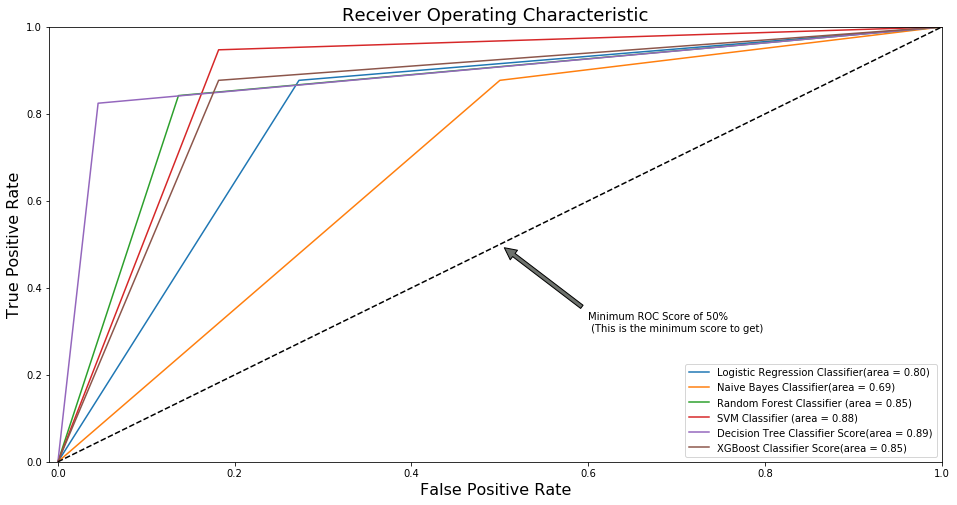

In [32]:
logreg_roc_auc = roc_auc_score(y_test, best_est_logit.predict(X_test))
logreg_fpr, logreg_tpr, logreg_thresold = roc_curve(y_test, best_est_logit.predict(X_test))

NB_roc_auc = roc_auc_score(y_test, grid_nb.predict(X_test))
NB_fpr, NB_tpr, NB_thresold = roc_curve(y_test, grid_nb.predict(X_test))

SVM_roc_auc = roc_auc_score(y_test, best_est_svm.predict(X_test))
SVM_fpr, SVM_tpr, rf_clf_threshold = roc_curve(y_test, best_est_svm.predict(X_test))

rf_clf_roc_auc = roc_auc_score(y_test, best_est_rf.predict(X_test))
rf_clf_fpr, rf_clf_tpr, rf_clf_threshold = roc_curve(y_test, best_est_rf.predict(X_test))

dt_clf_roc_auc = roc_auc_score(y_test, best_est_dt.predict(X_test))
dt_clf_fpr, dt_clf_tpr, dt_clf_threshold = roc_curve(y_test, best_est_dt.predict(X_test))

xgb_clf_roc_auc = roc_auc_score(y_test, best_est_xgb.predict(X_test))
xgb_fpr, xgb_tpr, xgb_thresold = roc_curve(y_test, best_est_xgb.predict(X_test))



def graph_roc_curve_multiple(logreg_fpr, logreg_tpr, NB_fpr, NB_tpr, rf_clf_fpr, rf_clf_tpr,SVM_fpr, SVM_tpr, dt_clf_fpr, dt_clf_tpr,xgb_fpr, xgb_tpr):
    plt.figure(figsize=(16,8))
    plt.title('Receiver Operating Characteristic', fontsize=18)
    plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression Classifier(area = %0.2f)'% logreg_roc_auc)
    plt.plot(NB_fpr, NB_tpr, label='Naive Bayes Classifier(area = %0.2f)'% NB_roc_auc)
    plt.plot(rf_clf_fpr, rf_clf_tpr, label='Random Forest Classifier (area = %0.2f)'% rf_clf_roc_auc)
    plt.plot(SVM_fpr, SVM_tpr, label='SVM Classifier (area = %0.2f)'% SVM_roc_auc)
    plt.plot(dt_clf_fpr, dt_clf_tpr, label='Decision Tree Classifier Score(area = %0.2f)'% dt_clf_roc_auc)
    plt.plot(xgb_fpr, xgb_tpr, label='XGBoost Classifier Score(area = %0.2f)'% xgb_clf_roc_auc)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
graph_roc_curve_multiple(logreg_fpr, logreg_tpr, NB_fpr, NB_tpr, rf_clf_fpr, rf_clf_tpr,SVM_fpr, SVM_tpr, dt_clf_fpr, dt_clf_tpr, xgb_fpr, xgb_tpr)
plt.show()